In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder

### Đọc và chia dữ liệu thành X, y


In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(1025, 14)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


### Chuẩn hoá lại giá trị, tránh gây tràn số và để đồng nhất khoảng giá trị của features


In [5]:
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
scaler = StandardScaler()

data[num_features] = scaler.fit_transform(data[num_features])

In [6]:
X = data.drop("target", axis=1)

In [7]:
cat_features_no_order = ["cp", "thal", "restecg"]
cat_features_order = ["slope", "ca"]  # Giữ nguyên

# One-Hot Encoding
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_features = encoder.fit_transform(X[cat_features_no_order])
encoded_df = pd.DataFrame(
    encoded_features, columns=encoder.get_feature_names_out(cat_features_no_order)
)

# Ghép lại dữ liệu
X = X.drop(columns=cat_features_no_order).reset_index(drop=True)
X = pd.concat([X, encoded_df], axis=1)

In [8]:
X

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,cp_1,cp_2,cp_3,thal_1,thal_2,thal_3,restecg_1,restecg_2
0,-0.268437,1,-0.377636,-0.659332,0,0.821321,0,-0.060888,2,2,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,-0.158157,1,0.479107,-0.833861,1,0.255968,1,1.727137,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.716595,1,0.764688,-1.396233,0,-1.048692,1,1.301417,0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.724079,1,0.936037,-0.833861,0,0.516900,0,-0.912329,2,1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.834359,0,0.364875,0.930822,1,-1.874977,0,0.705408,1,3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0.503520,1,0.479107,-0.484803,0,0.647366,1,-0.912329,2,0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1021,0.613800,1,-0.377636,0.232705,0,-0.352873,1,1.471705,1,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1022,-0.819834,1,-1.234378,0.562371,0,-1.353113,1,-0.060888,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1023,-0.488996,0,-1.234378,0.155137,0,0.429923,0,-0.912329,2,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
X = X.values

In [10]:
X

array([[-0.26843658,  1.        , -0.37763552, ...,  1.        ,
         1.        ,  0.        ],
       [-0.15815703,  1.        ,  0.4791073 , ...,  1.        ,
         0.        ,  0.        ],
       [ 1.71659547,  1.        ,  0.76468824, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [-0.81983438,  1.        , -1.23437834, ...,  0.        ,
         0.        ,  0.        ],
       [-0.4889957 ,  0.        , -1.23437834, ...,  0.        ,
         0.        ,  0.        ],
       [-0.04787747,  1.        , -0.66321646, ...,  1.        ,
         1.        ,  0.        ]], shape=(1025, 18))

In [11]:
y = data["target"]

In [12]:
y = y.values.reshape(-1, 1)

In [13]:
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [0]], shape=(1025, 1))

### Xây dựng hàm sigmoid


In [14]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Xây dựng hàm dự đoán


In [15]:
def predict(features, weights):
    z = np.dot(features, weights)
    return sigmoid(z)

### Xây dựng hàm phân lớp


In [16]:
def classify(predictions):
    classes = [1 if prediction >= 0.5 else 0 for prediction in predictions]
    return classes

### Xây dựng hàm mất mát


In [17]:
def cost_function(features, weights, labels):
    num_samples = len(labels)
    predictions = predict(features, weights)  # y_hat, còn labels là y
    cost_class1 = -labels * np.log(predictions)
    cost_class2 = -(1 - labels) * np.log(1 - predictions)
    cost = cost_class1 + cost_class2  #
    cost = cost.sum() / num_samples

    return cost

### Cập nhật trọng số


In [18]:
def update_weights(features, weights, labels, learning_rate):
    num_samples = len(labels)
    y_predictions = predict(features, weights)
    gradient = np.dot(features.T, y_predictions - labels) / num_samples
    weights -= learning_rate * gradient
    return weights

### Xây dựng mô hình


In [19]:
def train(X_bar, labels, num_epochs, learning_rate):
    d = X_bar.shape[1]
    weights = np.zeros((d, 1))

    losses = []
    best_weights = weights

    for epoch in range(num_epochs):
        weights = update_weights(X_bar, weights, labels, learning_rate)
        loss = cost_function(X_bar, weights, labels)
        losses.append(loss)

        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss: {loss}")

        if loss < min(losses):
            best_weights = weights

    return best_weights, losses

In [20]:
num_epochs = 20000
learning_rate = 0.01
X_bar = np.c_[np.ones((X.shape[0], 1)), X]

best_weights, losses = train(X_bar, y, num_epochs, learning_rate)

Epoch 0, loss: 0.6909636459588084
Epoch 100, loss: 0.5525201783065323
Epoch 200, loss: 0.4926711283325659
Epoch 300, loss: 0.46055673085427173
Epoch 400, loss: 0.44053481395846805
Epoch 500, loss: 0.42675653498625993
Epoch 600, loss: 0.41661808940362494
Epoch 700, loss: 0.408797346549873
Epoch 800, loss: 0.4025527132478775
Epoch 900, loss: 0.3974348928149936
Epoch 1000, loss: 0.39315456433895146
Epoch 1100, loss: 0.3895160624484768
Epoch 1200, loss: 0.3863816743490183
Epoch 1300, loss: 0.38365124400908823
Epoch 1400, loss: 0.3812499217135153
Epoch 1500, loss: 0.37912048341842364
Epoch 1600, loss: 0.377218333318682
Epoch 1700, loss: 0.3755081456324636
Epoch 1800, loss: 0.3739615433474506
Epoch 1900, loss: 0.37255545351302416
Epoch 2000, loss: 0.371270916224374
Epoch 2100, loss: 0.37009220540507703
Epoch 2200, loss: 0.36900616862630403
Epoch 2300, loss: 0.36800172385521696
Epoch 2400, loss: 0.3670694706397248
Epoch 2500, loss: 0.36620138607979486
Epoch 2600, loss: 0.36539058452388296
Epo

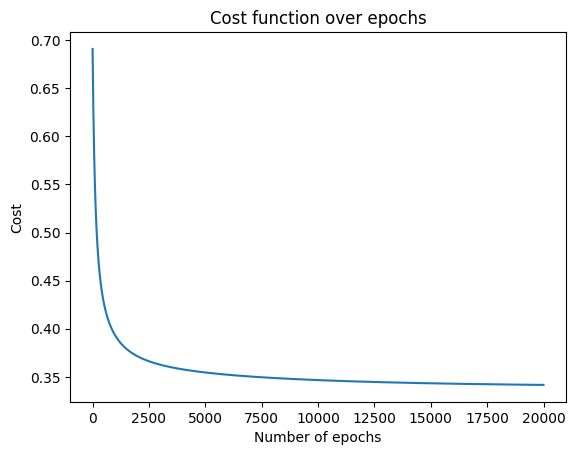

In [21]:
# Vẽ đồ thị biểu diễn cost
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Number of epochs")
plt.ylabel("Cost")
plt.title("Cost function over epochs")
plt.show()

### Tính toán độ chính xác


In [22]:
y_pred = predict(X_bar, best_weights)
y_pred = classify(y_pred)

n = X_bar.shape[0]
correct_records = 0
for i in range(n):
    if y_pred[i] == y[i]:
        correct_records += 1

accuracy = correct_records / n
accuracy

0.8575609756097561